# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler)
from sklearn.metrics import mean_squared_error

RANDOM = 42


In [2]:
try:
    df_0 = pd.read_csv('geo_data_0.csv')
    df_1 = pd.read_csv('geo_data_1.csv') 
    df_2 = pd.read_csv('geo_data_2.csv') 
except:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv') 
    #df_2 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv') # код ревьюера

In [3]:
print('Первый набор данных:')
display(df_0.head())
print('Второй набор данных:')
display(df_1.head())
print('Третий набор данных:')
display(df_2.head())

Первый набор данных:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Второй набор данных:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Третий набор данных:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
print('Первый набор данных:')
display(df_0.info())
print('Второй набор данных:')
display(df_1.info())
print('Третий набор данных:')
display(df_2.info())
#Отлично, пропусков в данных нет.

Первый набор данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Второй набор данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Третий набор данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

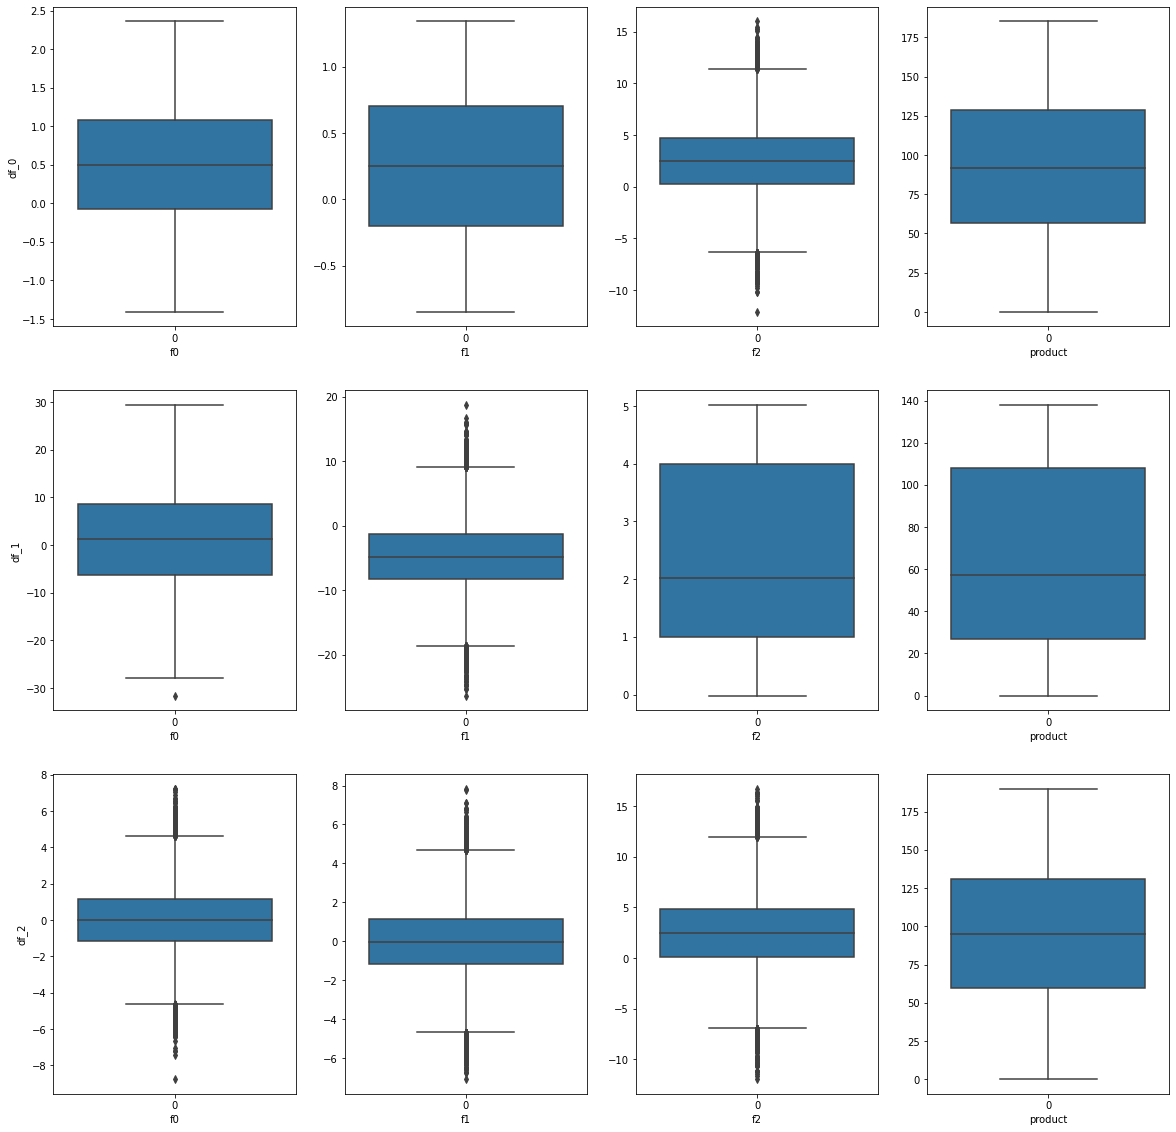

In [5]:
#Посмотрим есть ли выбросы в данных:
fig, ax = plt.subplots(3, 4, figsize=(20, 20))

for i, col in zip(range(0,4), ['f0', 'f1', 'f2', 'product']):
        sns.boxplot(data=df_0[col], ax=ax[0, i])
        ax[0, i].set_xlabel(col)
        ax[0, 0].set_ylabel("df_0")
  
for i, col in zip(range(0,4), ['f0', 'f1', 'f2', 'product']):
        sns.boxplot(data=df_1[col], ax=ax[1, i])
        ax[1, i].set_xlabel(col)
        ax[1, 0].set_ylabel("df_1")

for i, col in zip(range(0,4), ['f0', 'f1', 'f2', 'product']):
        sns.boxplot(data=df_2[col], ax=ax[2, i])
        ax[2, i].set_xlabel(col)
        ax[2, 0].set_ylabel("df_2")

#В каждом из наборов данных наблюдаются выбросы. Выбрсы мешают алгоритмама построить правильное решающее правило, поэтому
#я считаю что выбросы строит отбросить. Но для этого сначала посмотрим какое количество данных мы теряем

In [6]:
def get_clean_data(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df.loc[(df[col]  < q3 + 1.5*iqr) & (df[col]  > q1 - 1.5*iqr)]

zero = len(df_0) - len(get_clean_data(df_0, 'f2'))
zero_perc = round((1 - len(get_clean_data(df_0, 'f2'))/len(df_0))*100, 1)

one = len(df_1) - len(get_clean_data(df_1, 'f1'))
one_perc = round((1 - len(get_clean_data(df_1, 'f1'))/len(df_1))*100, 1)

two = len(df_2) - len(get_clean_data(get_clean_data(get_clean_data(df_2, 'f0'), 'f1'), 'f2'))
two_perc = round((1 - (len(get_clean_data(get_clean_data(get_clean_data(df_2, 'f0'), 'f1'), 'f2')))/len(df_2))*100, 1)
                                                                                       
print(f'Отбраcываем {zero} строк в df_0 ({zero_perc} % строк)')
print(f'Отбраcываем {one} строк в df_1 ({one_perc} % строк)')
print(f'Отбраcываем {two} строк в df_2 ({two_perc} % строк)')

#Отлично. Потерю такого количества данных мы не заменим, а модели будет проще искать в данных закономерности.

Отбраcываем 506 строк в df_0 (0.5 % строк)
Отбраcываем 636 строк в df_1 (0.6 % строк)
Отбраcываем 1997 строк в df_2 (2.0 % строк)


In [7]:
df_0 = get_clean_data(df_0, 'f2')
df_1 = get_clean_data(df_1, 'f1')
df_2 = get_clean_data(get_clean_data(get_clean_data(df_2, 'f0'), 'f1'), 'f2')

In [8]:
print('Распределение переменных в df_0')
display(df_0.describe(include='all').transpose())
print('Распределение переменных в df_1')
display(df_1.describe(include='all').transpose())
print('Распределение переменных в df_2')
display(df_2.describe(include='all').transpose())

#При обучении модели признаки нужно будет масштабировать из-за большого разброса

Распределение переменных в df_0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,99494,99484,A5aEY,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f0,99494.0,NaN,NaN,NaN,0.50057,0.871838,-1.408605,-0.072378,0.502606,1.073729,2.362331
f1,99494.0,NaN,NaN,NaN,0.250044,0.504437,-0.848218,-0.201063,0.250032,0.700574,1.343769
f2,99494.0,NaN,NaN,NaN,2.503399,3.181196,-6.352956,0.301496,2.516336,4.704256,11.353804
product,99494.0,NaN,NaN,NaN,92.500677,44.22933,0.0,56.567678,91.842533,128.517876,185.364347


Распределение переменных в df_1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,99364,99360,bfPNe,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f0,99364.0,NaN,NaN,NaN,1.139661,8.966349,-31.609576,-6.300689,1.150044,8.621015,29.421755
f1,99364.0,NaN,NaN,NaN,-4.803101,4.984107,-18.667777,-8.249871,-4.816643,-1.363538,9.050688
f2,99364.0,NaN,NaN,NaN,2.493961,1.703241,-0.018144,1.000016,2.011374,3.999893,5.019721
product,99364.0,NaN,NaN,NaN,68.809919,45.934941,0.0,26.953261,57.085625,107.813044,137.945408


Распределение переменных в df_2


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,98003,97999,Vcm5J,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f0,98003.0,NaN,NaN,NaN,0.000788,1.679981,-4.64083,-1.153136,0.008893,1.14822,4.637965
f1,98003.0,NaN,NaN,NaN,-0.002182,1.681475,-4.676782,-1.164226,-0.009345,1.155001,4.67061
f2,98003.0,NaN,NaN,NaN,2.494648,3.38978,-6.944602,0.147699,2.482845,4.841025,11.945919
product,98003.0,NaN,NaN,NaN,94.785072,44.685282,0.0,59.330119,94.696578,130.319425,190.029838


In [9]:
#Проверим данные на наличие дубликатов
print(f'Количество дубликатов в df_0: {df_0.duplicated().sum()}')
print(f'Количество дубликатов в df_1: {df_1.duplicated().sum()}')
print(f'Количество дубликатов в df_2: {df_2.duplicated().sum()}')
#Дубликатов тоже нет, отлично

Количество дубликатов в df_0: 0
Количество дубликатов в df_1: 0
Количество дубликатов в df_2: 0


Text(0.5, 1.0, 'df_2')

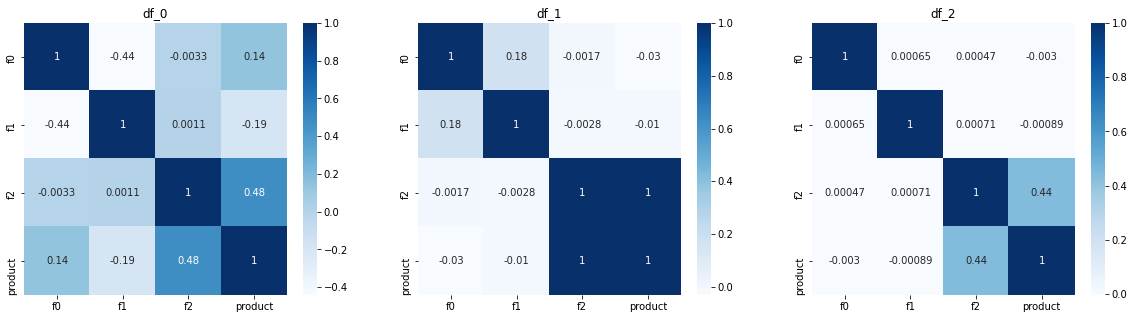

In [10]:
#Проверим как сильно данные кореллируют между собой
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(df_0.corr(), cmap="Blues", ax=ax[0], annot=True)
ax[0].set_title("df_0")
sns.heatmap(df_1.corr(), cmap="Blues", ax=ax[1], annot=True)
ax[1].set_title("df_1")
sns.heatmap(df_2.corr(), cmap="Blues", ax=ax[2], annot=True)
ax[2].set_title("df_2")



### Выводы по подготовке данных

Пропусков и дубликатов в данных не обнаружено, это радует. Во всех наборах данных в признаках наблюдаются выбросы. Т.к. их доля не высока - отбросим их. 

в df_2 признак f2 и целевая переменная очень сильно коррелируют друг с другом. Для того, чтобы не портить прогноз - решено отбросить эту переменную. 

В df_0 у признаков f0 и f1 сильная отрицательная корреляция

## Обучение и проверка модели

In [11]:
def split_train_predict(data):
    features = data.drop(['id', 'product'], axis = 1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=RANDOM)
    scaler = MinMaxScaler()
    numeric = ['f0', 'f1', 'f2']
    scaler.fit(features_train[numeric]) 
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
   
    
    lr = LinearRegression()
    lr.fit(features_train, target_train)
    pred = lr.predict(features_valid)
    pred = pd.Series(pred)
    rmse = (mean_squared_error(pred, target_valid))**(0.5)
    average_product_pred = sum(pred) / len(pred)
    
    print(f'RMSE: {rmse}')
    print(f'Средний предсказанный объём запасов в скважине {average_product_pred}')
    
    return pred, target_valid.reset_index(drop = True) # Почему-то в taeget_valid индексы странным образом перемешаны. 
                                                       # Уже долго сижу с задачей и уже не очень соображаю почему


print('Регион df_0:')
split_train_predict(df_0)
print('-------------------')
print('Регион df_1:')
split_train_predict(df_1)
print('-------------------')    
print('Регион df_2:')
split_train_predict(df_2)
print('-------------------')
    

Регион df_0:
RMSE: 37.815104778634264
Средний предсказанный объём запасов в скважине 92.35054696467056
-------------------
Регион df_1:
RMSE: 0.8911478860562432
Средний предсказанный объём запасов в скважине 68.54948307873201
-------------------
Регион df_2:
RMSE: 40.12959008344122
Средний предсказанный объём запасов в скважине 94.95178110761863
-------------------


In [12]:
#Сохраним необходимую информацию в отдельные переменные
pred_0, target_0 = split_train_predict(df_0)
pred_1, target_1 = split_train_predict(df_1)
pred_2, target_2 = split_train_predict(df_2)

RMSE: 37.815104778634264
Средний предсказанный объём запасов в скважине 92.35054696467056
RMSE: 0.8911478860562432
Средний предсказанный объём запасов в скважине 68.54948307873201
RMSE: 40.12959008344122
Средний предсказанный объём запасов в скважине 94.95178110761863


### Выводы по обучению и проверке моделей

* Минимальня среднеквадратическая ошибка в регионах df_1 и df_2.
* Самый большой средний предсказанный объем запалов в скважине в регионе df_0, но по нему самая большая среднеквадратическая ошибка при предсказании.
* Запас нефти в df_1 и df_2 значительно меньше, чем в df_0, но точность предсказаний там на несколько порядков превышает точность в df_0.

## Подготовка к расчёту прибыли

In [13]:
budget = 10**10
profit_p_bar = 450
points_to_develop = 200
break_even = round(budget/(profit_p_bar*1000))
break_even_average = round(budget/(profit_p_bar*1000)) / points_to_develop

In [14]:
#Определим количество баррелей, необходимых для безубыточной разработки новой скважины
print(f'Для безубыточной разработки необходимо {break_even} баррелей')
print(f'Необходимый средний объем запасов сырья в скважине для безубыточной разработки - {break_even_average}')

Для безубыточной разработки необходимо 22222 баррелей
Необходимый средний объем запасов сырья в скважине для безубыточной разработки - 111.11


In [15]:
print('Распределение объема сырья по региону df_0')
display(df_0['product'].describe())
print('Распределение объема сырья по региону df_1')
display(df_1['product'].describe())
print('Распределение объема сырья по региону df_2')
display(df_2['product'].describe())


Распределение объема сырья по региону df_0


count    99494.000000
mean        92.500677
std         44.229330
min          0.000000
25%         56.567678
50%         91.842533
75%        128.517876
max        185.364347
Name: product, dtype: float64

Распределение объема сырья по региону df_1


count    99364.000000
mean        68.809919
std         45.934941
min          0.000000
25%         26.953261
50%         57.085625
75%        107.813044
max        137.945408
Name: product, dtype: float64

Распределение объема сырья по региону df_2


count    98003.000000
mean        94.785072
std         44.685282
min          0.000000
25%         59.330119
50%         94.696578
75%        130.319425
max        190.029838
Name: product, dtype: float64

In [16]:
#Посмотрим какая доля месторождений в каждом регионе удослетворяют минимальному объему безубыточной разработки месторождения
def how_much_points(data, region_name):
    for i in np.arange(0.0, 1.0, 0.01):
        if data['product'].quantile(i) < break_even_average:
            continue
        else:
            text = f'Доля месторождений, в регионе {region_name}, удовлетворяющих минимальному среднему объему сырья для безубыточного производства - {round((1 - i)*100)}%'
            return text
        
display(how_much_points(df_0, 'df_0'))
display(how_much_points(df_1, 'df_1'))
display(how_much_points(df_2, 'df_2'))

'Доля месторождений, в регионе df_0, удовлетворяющих минимальному среднему объему сырья для безубыточного производства - 36%'

'Доля месторождений, в регионе df_1, удовлетворяющих минимальному среднему объему сырья для безубыточного производства - 16%'

'Доля месторождений, в регионе df_2, удовлетворяющих минимальному среднему объему сырья для безубыточного производства - 37%'

In [17]:
#Функция расчета прибыли
def get_profit(predicted, target):
    best_points_predicted = predicted.sort_values(ascending = False).iloc[:200]
    best_points_true = target[best_points_predicted.index]
    profit = best_points_true.sum() * profit_p_bar * 1000 - budget
    return profit

In [18]:
display(f'Прибыль с региона df_0 - {get_profit(pred_0, target_0)}')
display(f'Прибыль с региона df_1 - {get_profit(pred_1, target_1)}')
display(f'Прибыль с региона df_2 - {get_profit(pred_2, target_2)}')

'Прибыль с региона df_0 - 3252359903.112892'

'Прибыль с региона df_1 - 2415086696.681513'

'Прибыль с региона df_2 - 2385314465.926655'

### Выводы по подготовке к расчету прибыли
Средний запас сырья, необходимый для безубыточно разработки месторождения выше, чем средний объем запасов в скажинах по каждому из регионов.

* Доля месторождений, в регионе **df_0**, удовлетворяющих минимальному среднему объему сырья для безубыточного производства - **36%**.
* Доля месторождений, в регионе **df_1**, удовлетворяющих минимальному среднему объему сырья для безубыточного производства - **16%**.
* Доля месторождений, в регионе **df_2**, удовлетворяющих минимальному среднему объему сырья для безубыточного производства - **16%**.



## Расчёт прибыли и рисков 

In [19]:
state = np.random.RandomState(RANDOM)

def get_risk_and_confidence_interval(target, predicted):
    profit_bootstraped = []
    for i in range(1000):
        target_sample = target.sample(500, replace=True, random_state=state)
        predicted_sample = predicted[target_sample.index]
        profit_bootstraped.append(get_profit(predicted_sample, target_sample))
        
        lower = pd.Series(profit_bootstraped).quantile(0.025)
        upper = pd.Series(profit_bootstraped).quantile(0.975)
        mean_profit = int(sum(profit_bootstraped) / len(profit_bootstraped))
        risk = (pd.Series(profit_bootstraped) < 0).mean()

    return lower, upper, mean_profit, risk


In [21]:
i = 0
for pred, target in zip([pred_0, pred_1, pred_2], [target_0, target_1, target_2]):
    if i == 0:
        reg = 'df_0'
    elif i == 1:
        reg = 'df_1'
    else:
        reg = 'df_2'
    lower, upper, mean_profit, risk = get_risk_and_confidence_interval(target, pred)
    print(f'Данные по региону {reg}:')
    print(f'Доверительный интервал: ({lower} ; {upper})')
    print(f'Средняя ожидаемая прибыль: {mean_profit} руб.')
    print(f'Риск убытков: {risk* 100}%')
    print('-----------------')
    i = i+1

Данные по региону df_0:
Доверительный интервал: (29385299.49612489 ; 1230136774.839308)
Средняя ожидаемая прибыль: 587320944 руб.
Риск убытков: 2.1%
-----------------
Данные по региону df_1:
Доверительный интервал: (168728837.50904122 ; 1156634792.46338)
Средняя ожидаемая прибыль: 643852712 руб.
Риск убытков: 0.4%
-----------------
Данные по региону df_2:
Доверительный интервал: (-15363043.175278893 ; 1221205727.4768589)
Средняя ожидаемая прибыль: 586819021 руб.
Риск убытков: 3.0%
-----------------


## Выводы

Проанализированы данные по разработке месторождений в трех регионах. Учтены выбросы, корреляция целевой переменной и признаков, проверено наличие дубликатов и пропущенных значений.

Обучена модель для предсказания объема сырья в скважине. Сделаны предсказания для скважин в каждом из регионов. RMSE модели по региону df_0 - 38, по df_1 и df_2 - 0,89. В fd_0 ошибка достаточно больша, учитывая, что максимальный объем сырья в скважине в районе 190 тыс.баррелей. В остальных регионах ошибка допустимая.

На основании исходных данных определен минимальный средний объем сырья к скважине для безубыточной разработке - 111 тыс. баррелей. В регионе df_0 под это условие подходит 36% скважин, в регионе df_1 - 16%, в df_2 - 16%.

Определена вохможная прибыль в каждом из регионов. Так же, с помощю процедуры bootstrap определен доверительный интвервал и средняя ожидаемая прибыль. 

* **df_0:**
** Данные по региону df_0:
** Доверительный интервал: (-6625783.722417579 ; 1252787387.06034)
** Средняя ожидаемая прибыль: 601831624 руб.
** Риск убытков: 2.7%

* **df_1:**
** Доверительный интервал: (147733283.8293596 ; 1205478766.4400141)
** Средняя ожидаемая прибыль: 643767996 руб.
** Риск убытков: 0.5%


* **df_2:**
** Доверительный интервал: (185090503.61907253 ; 1257487156.9281445)
** Средняя ожидаемая прибыль: 676695033 руб.
** Риск убытков: 0.4%

Учитывая результаты расчетов, для безубыточной разработки лучше всего подходят регионы df_1 и df_2, тк в них самая высокая ожидаемая прибыль и самый низкий риск убытков (df_2 подзодит даже лучше).
